## データ準備

In [184]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [250]:
# データセットダウンロード
df = sns.load_dataset('tips')

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
# チップ率というカラムを追加
df['tip_rate'] = df["tip"] / df["total_bill"]

In [5]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


## 分布の描画

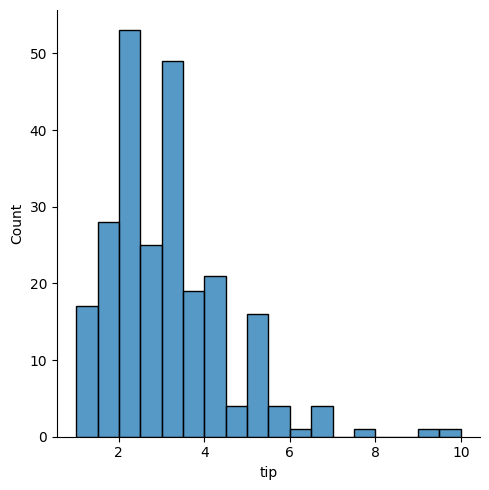

In [6]:
sns.displot(df['tip'])

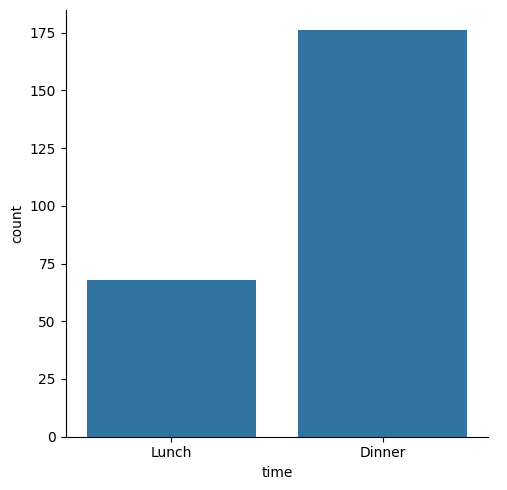

In [7]:
sns.catplot(x = 'time',data = df, kind = 'count')

## 平均値

In [8]:
import numpy as np

In [9]:
np.mean(df['tip'])

np.float64(2.99827868852459)

In [10]:
np.mean(df['tip_rate'])

np.float64(0.16080258172250472)

In [11]:
df['tip'].mean()

np.float64(2.99827868852459)

In [14]:
# groupby(x, observed = True) : カテゴリカルデータに対して実際にデータとして観測されたカテゴリ（カテゴリー）のみをグループ化
# mean(numeric_only = True) : 自動で数値型データのみの平均を出してくれる
df.groupby('sex', observed = True).mean(numeric_only = True)

,total_bill,tip,size,tip_rate
sex,,,,
Male,20.744076,3.089618,2.630573,0.157651
Female,18.056897,2.833448,2.459770,0.166491


<Axes: xlabel='sex', ylabel='tip_rate'>

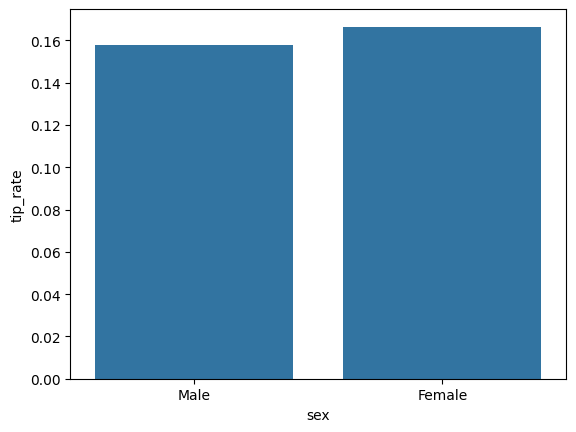

In [15]:
sns.barplot(x = 'sex', y = 'tip_rate',data = df, errorbar = None)

<Axes: xlabel='sex'>

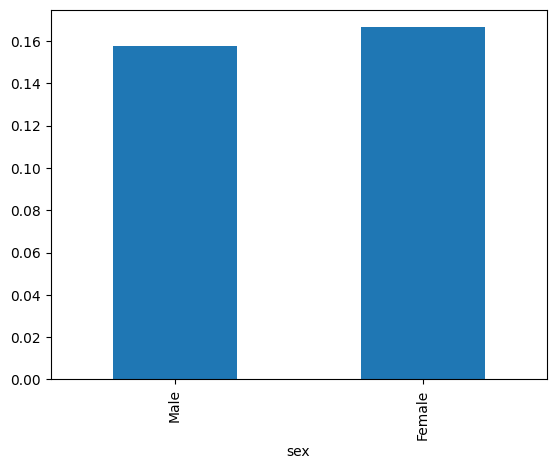

In [16]:
(df.groupby('sex', observed = True)['tip_rate'].mean()).plot(kind = 'bar')

## 中央値

In [17]:
np.median(df['tip'])

np.float64(2.9)

In [18]:
df['tip_rate'].median()

np.float64(0.15476977125802577)

In [19]:
df.groupby('sex', observed = True)['tip_rate'].median()

sex
Male      0.153492
Female    0.155581
Name: tip_rate, dtype: float64

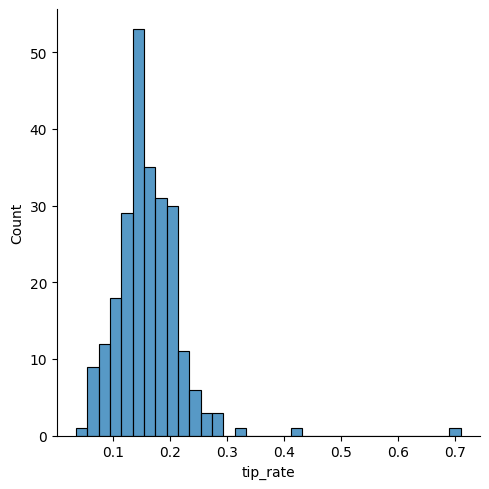

In [20]:
sns.displot(df['tip_rate'])

<Axes: xlabel='sex', ylabel='tip_rate'>

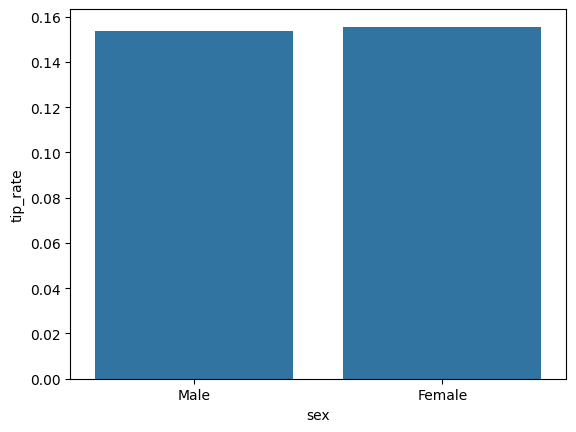

In [21]:
sns.barplot(x = 'sex', y = 'tip_rate', data = df, estimator = 'median', errorbar = None)

In [22]:
df.sort_values('tip_rate', ascending = False)

,total_bill,tip,sex,smoker,day,time,size,tip_rate
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
...,...,...,...,...,...,...,...,...
187,30.46,2.00,Male,Yes,Sun,Dinner,5,0.065660
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
57,26.41,1.50,Female,No,Sat,Dinner,2,0.056797
102,44.30,2.50,Female,Yes,Sat,Dinner,3,0.056433


## 最頻値

In [23]:
from scipy import stats

In [24]:
# stats.mode()は数値カラムに対応、カテゴリカルカラムには対応していない
mode, count = stats.mode(df['size'])
print(mode)
print(count)

2
156


In [25]:
df['time'].mode()

0    Dinner
Name: time, dtype: category
Categories (2, object): ['Lunch', 'Dinner']

## 範囲

In [26]:
np.min(df['tip'])

np.float64(1.0)

In [27]:
df['tip'].min()

np.float64(1.0)

In [28]:
df.groupby('sex', observed = True).min(numeric_only = True)

,total_bill,tip,size,tip_rate
sex,,,,
Male,7.25,1.0,1,0.035638
Female,3.07,1.0,1,0.056433


In [29]:
df['tip'].max()

np.float64(10.0)

In [30]:
df.groupby('sex', observed = True).max(numeric_only = True)

,total_bill,tip,size,tip_rate
sex,,,,
Male,50.81,10.0,6,0.710345
Female,44.30,6.5,6,0.416667


In [31]:
df['tip'].max() - df['tip'].min()

np.float64(9.0)

## 四分位数

In [32]:
np.quantile(df['tip_rate'], [0.25, 0.5, 0.75])

array([0.12912736, 0.15476977, 0.19147549])

In [33]:
df['tip_rate'].quantile([0.25, 0.5, 0.75])

0.25    0.129127
0.50    0.154770
0.75    0.191475
Name: tip_rate, dtype: float64

In [34]:
# IQR
stats.iqr(df['tip_rate'])

np.float64(0.06234812458689151)

In [35]:
# QD
stats.iqr(df['tip_rate']) / 2

np.float64(0.031174062293445756)

In [36]:
import matplotlib.pyplot as plt

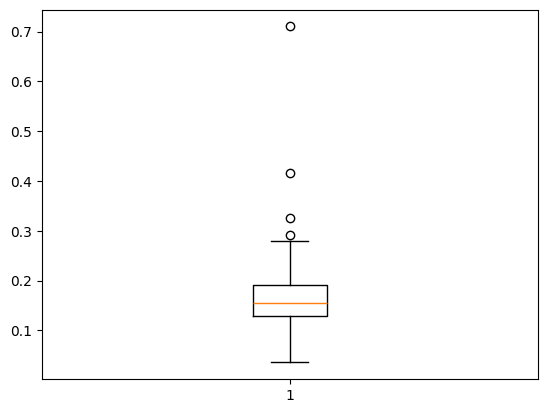

In [37]:
# ひげの長さ ： Q1-1.5IQR, Q3+1.5IQR
plt.boxplot(df['tip_rate'])
plt.show()

<Axes: xlabel='sex', ylabel='tip_rate'>

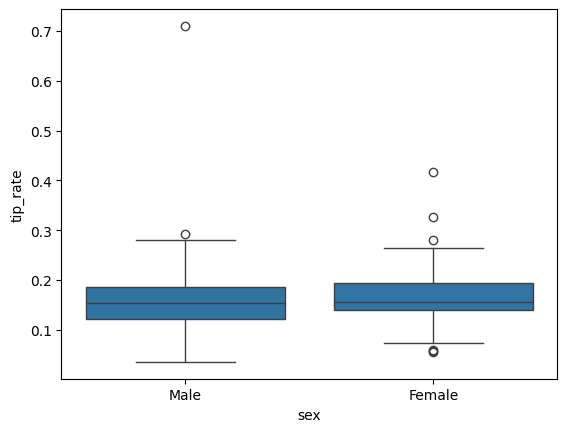

In [38]:
sns.boxplot(x = 'sex', y = 'tip_rate', data = df)

## 分散と標準偏差

In [39]:
np.var(df['tip'])

np.float64(1.9066085124966412)

In [40]:
np.std(df['tip'])

np.float64(1.3807999538298954)

## 共分散

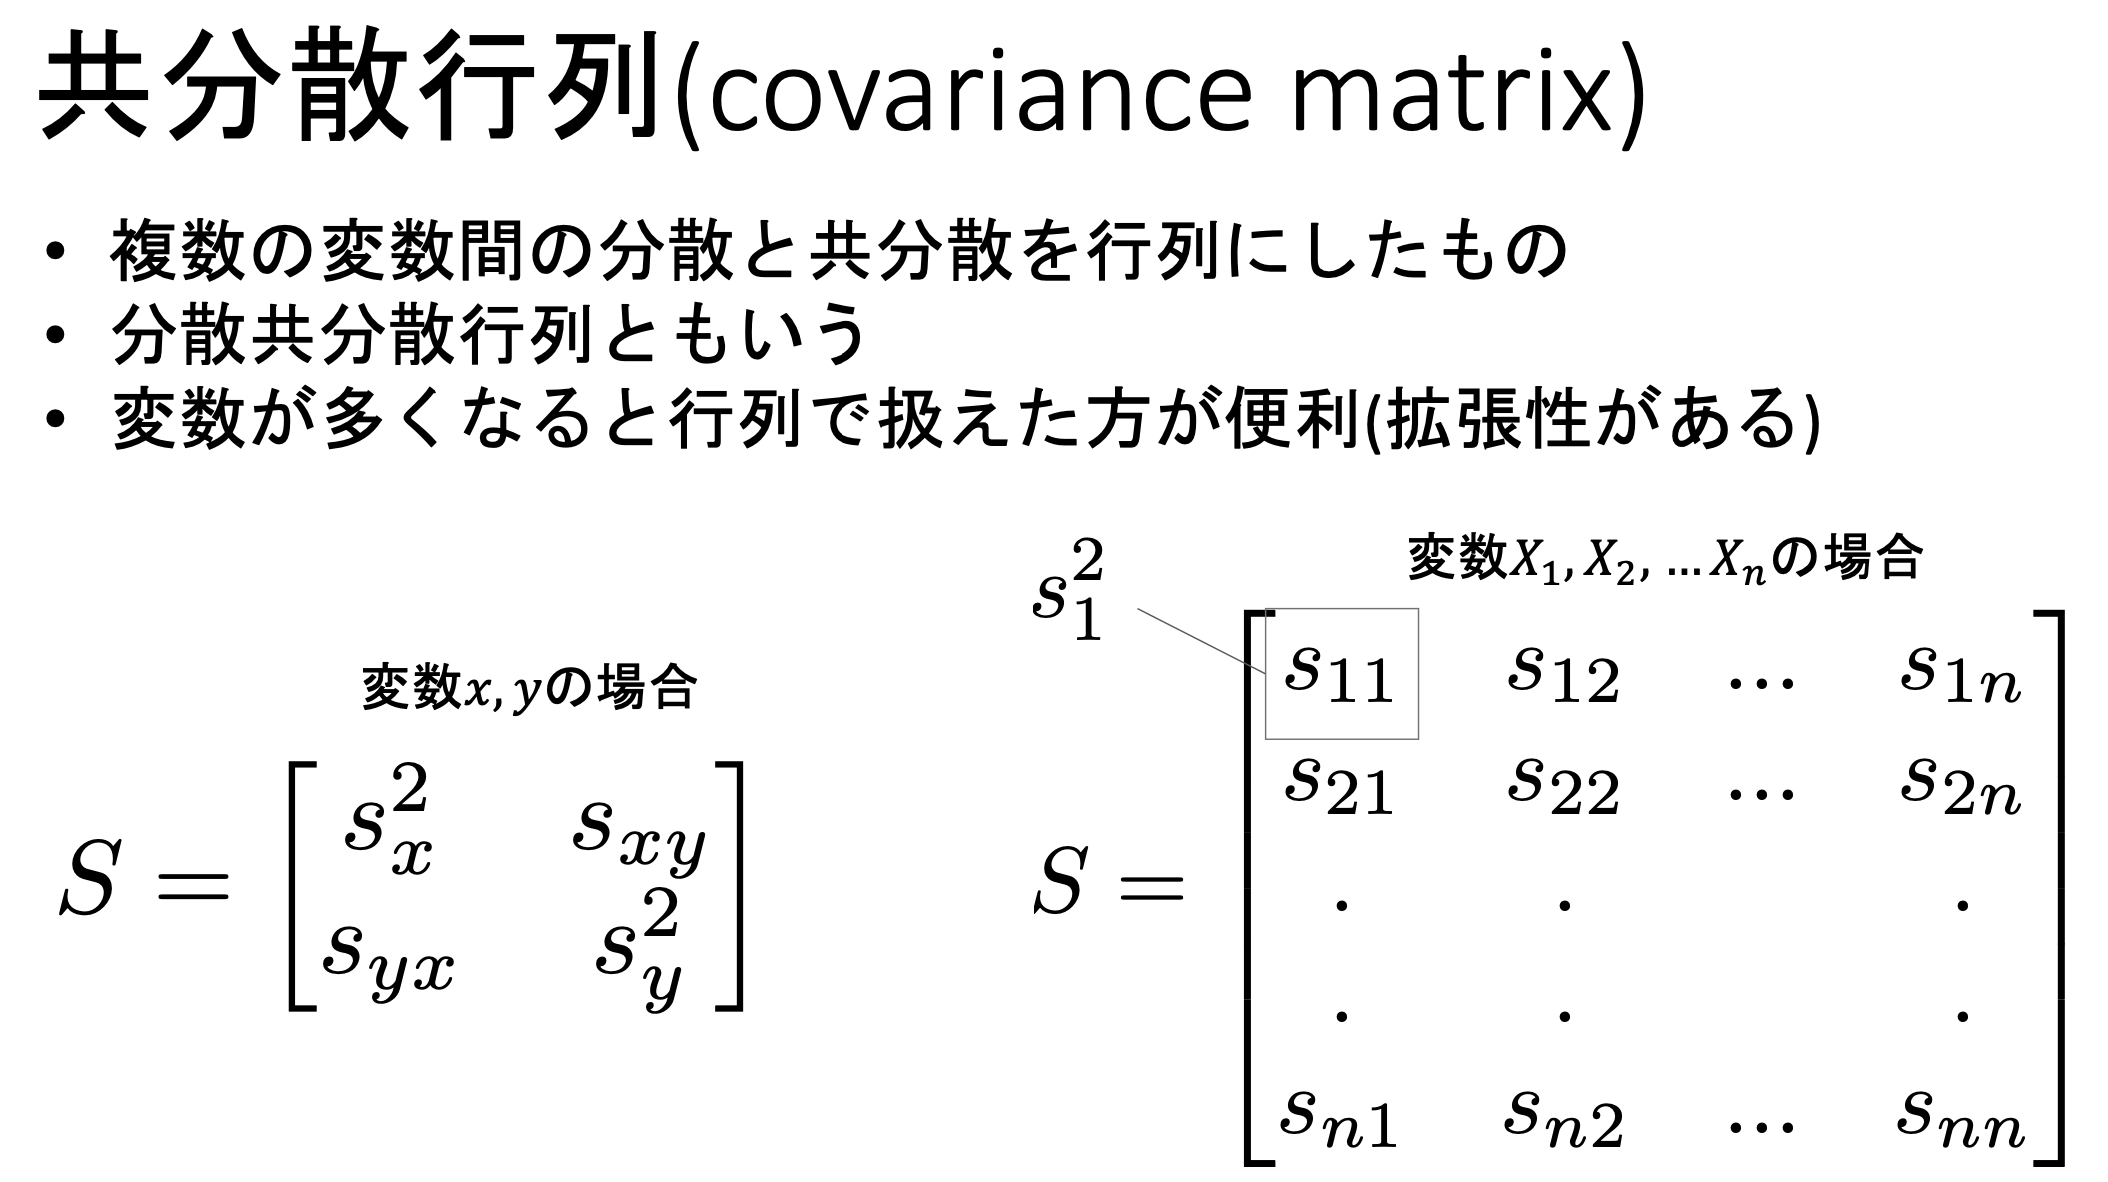

In [41]:
np.cov(df['tip'], df['total_bill']) # 不偏共分散行列が出力されている（n-1で割られている）

array([[ 1.91445464,  8.32350163],
       [ 8.32350163, 79.25293861]])

In [42]:
np.cov(df['tip'], df['total_bill'], bias = True) # 共分散行列が出力される

array([[ 1.90660851,  8.28938892],
       [ 8.28938892, 78.92813149]])

In [45]:
# 行方向に連結
# [total_bill]
# [tip]
# [size]
np.stack([df['total_bill'], df['tip'], df['size']], axis = 0).shape

(3, 244)

In [46]:
x = np.stack([df['total_bill'], df['tip'], df['size']], axis = 0)
np.cov(x, bias = True)

array([[78.92813149,  8.28938892,  5.04522121],
       [ 8.28938892,  1.90660851,  0.64126747],
       [ 5.04522121,  0.64126747,  0.9008835 ]])

In [47]:
# 各カラムのスケールが異なるので、共分散行列から相関関係については分からない
df.select_dtypes(exclude = 'category').cov()

,total_bill,tip,size,tip_rate
total_bill,79.252939,8.323502,5.065983,-0.184107
tip,8.323502,1.914455,0.643906,0.028931
size,5.065983,0.643906,0.904591,-0.008298
tip_rate,-0.184107,0.028931,-0.008298,0.003730


In [48]:
df.cov(numeric_only = True)

,total_bill,tip,size,tip_rate
total_bill,79.252939,8.323502,5.065983,-0.184107
tip,8.323502,1.914455,0.643906,0.028931
size,5.065983,0.643906,0.904591,-0.008298
tip_rate,-0.184107,0.028931,-0.008298,0.003730


## 相関係数

In [49]:
np.corrcoef(df['total_bill'], df['tip'])

array([[1.        , 0.67573411],
       [0.67573411, 1.        ]])

In [51]:
x = np.stack([df['total_bill'], df['tip'], df['size']], axis = 0)
np.corrcoef(x)

array([[1.        , 0.67573411, 0.59831513],
       [0.67573411, 1.        , 0.48929878],
       [0.59831513, 0.48929878, 1.        ]])

In [53]:
df.select_dtypes(exclude = 'category').corr()

,total_bill,tip,size,tip_rate
total_bill,1.000000,0.675734,0.598315,-0.338624
tip,0.675734,1.000000,0.489299,0.342370
size,0.598315,0.489299,1.000000,-0.142860
tip_rate,-0.338624,0.342370,-0.142860,1.000000


<Axes: >

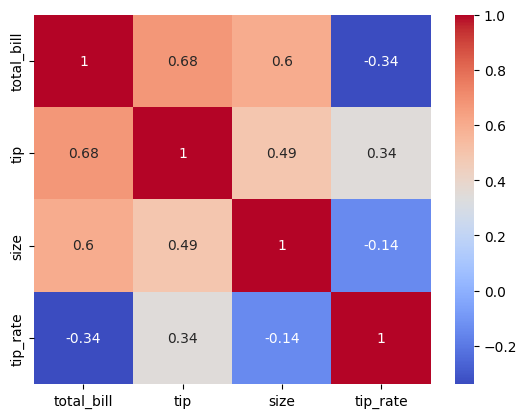

In [58]:
# ヒートマップ
sns.heatmap(df.select_dtypes(exclude = 'category').corr(), cmap = 'coolwarm', annot = True)

## 連関（association）

In [59]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


In [60]:
pd.crosstab(df['sex'], df['time'])

time,Lunch,Dinner
sex,,
Male,33,124
Female,35,52


### カイ二乗と期待度数

In [62]:
cont_table = pd.crosstab(df['sex'], df['time'])
result = stats.chi2_contingency(cont_table, correction = False)

In [65]:
result

Chi2ContingencyResult(statistic=np.float64(10.277251918677742), pvalue=np.float64(0.0013468039268008769), dof=1, expected_freq=array([[ 43.75409836, 113.24590164],
       [ 24.24590164,  62.75409836]]))

In [67]:
# カイ二乗値
print(f"カイ二乗値 : {result.statistic}")
# 期待度数
print(f"期待度数 : {result.expected_freq}")

カイ二乗値 : 10.277251918677742
期待度数 : [[ 43.75409836 113.24590164]
 [ 24.24590164  62.75409836]]


## クラメールの連関係数

In [70]:
len(cont_table.columns)

2

In [71]:
len(df['sex'])

244

In [76]:
def cramers_v(x, y):
    cont_table = pd.crosstab(x, y)
    result = stats.chi2_contingency(cont_table, correction = True)
    v = np.sqrt(result.statistic/((min(cont_table.shape)-1)*len(x)))
    return v

In [77]:
cramers_v(df['sex'], df['time'])

np.float64(0.19568929227358184)

## 確率分布
- 確率変数
    - 値が確率的に変動する変数
        - 例えば、サイコロの目

In [89]:
# random variates(rsv) : 確率変量 ← 確率変数の実際の値
# 1〜6の値を取る　離散型一様分布
stats.randint.rvs(1, 7)
# stats.randint(1, 7).rvs() 上記と同じ意味

5

In [90]:
# 期待値
stats.randint(1, 7).mean()

np.float64(3.5)

In [92]:
# 連続型一様分布
stats.uniform.rvs(0, 1)
# stats.uniform(0, 1).rvs() 上記と同じ意味

np.float64(0.3616662713004797)

## 確率分布の描画

In [118]:
def simple_func(x):
    return x**2 + 3

In [119]:
x = np.arange(-3, 4)
print(x)

[-3 -2 -1  0  1  2  3]


In [120]:
y = simple_func(x)

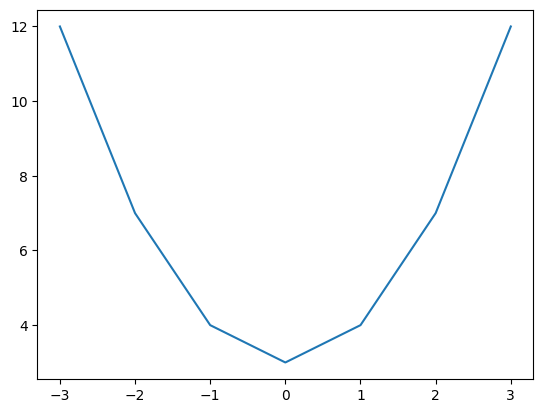

In [121]:
plt.plot(x, y)

### 離散型確率分布

In [126]:
x = np.arange(1, 7)
y = stats.randint(1, 7).pmf(x)
print(x)
print(y)

[1 2 3 4 5 6]
[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]


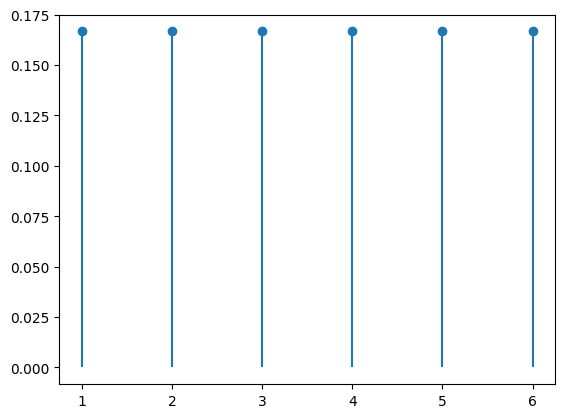

In [129]:
plt.plot(x, y, 'o')
plt.vlines(x, 0, y)

### 連続型確率分布

In [134]:
x = np.linspace(-2, 2, 1000)
y = stats.uniform(0, 1).pdf(x)

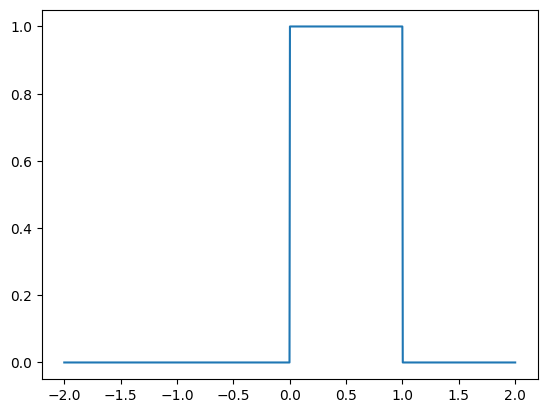

In [135]:
plt.plot(x, y)

## 累積分布関数(CDF)

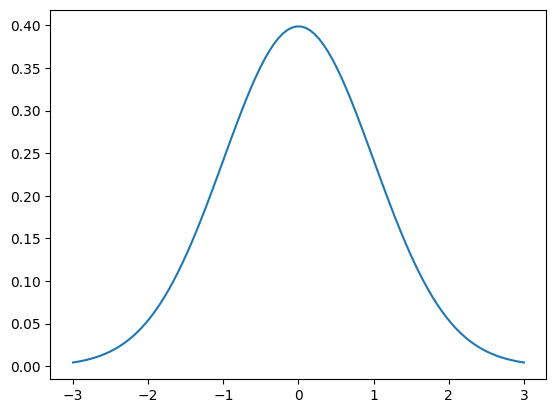

In [138]:
x = np.linspace(-3, 3, 100)
y = stats.norm.pdf(x)
plt.plot(x, y)

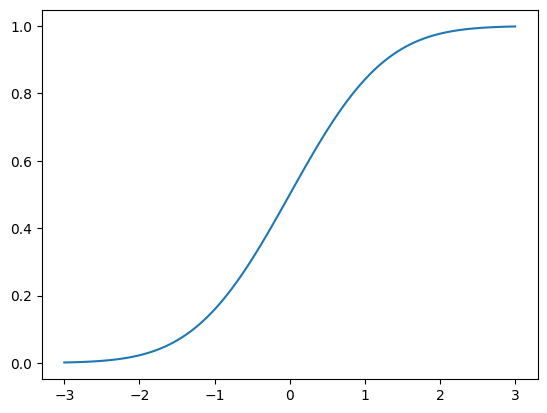

In [140]:
y = stats.norm.cdf(x)
plt.plot(x, y)

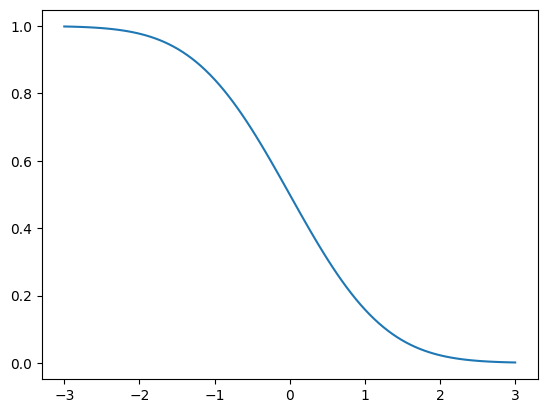

In [144]:
# 右側の面積(1-累積分布関数cdf)の分布
y = stats.norm.sf(x)
plt.plot(x, y)

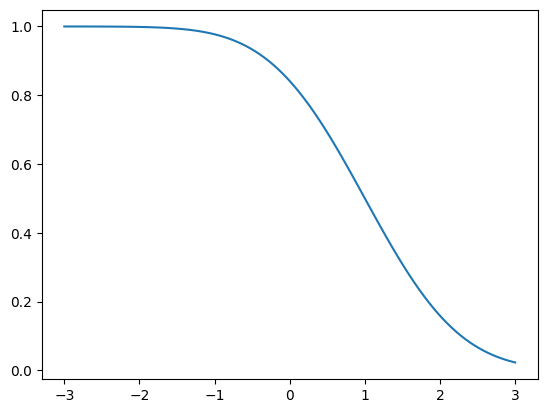

In [145]:
y = stats.norm.cdf(1-x)
plt.plot(x, y)

## 正規分布

In [147]:
stats.norm(loc = 10, scale = 3).rvs()

np.float64(10.46862533549243)

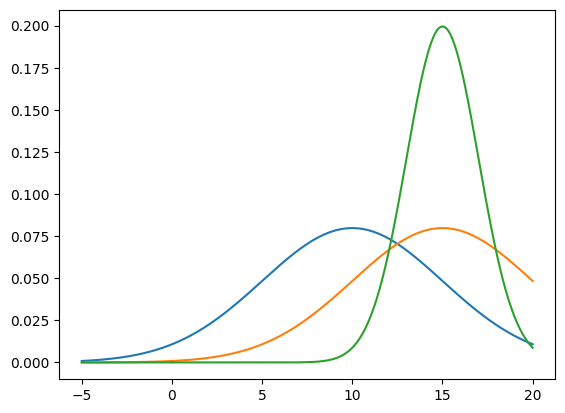

In [151]:
x = np.linspace(-5, 20, 1000)
y = stats.norm(10, 5).pdf(x)
y2 = stats.norm(15, 5).pdf(x)
y3 = stats.norm(15, 2).pdf(x)
plt.plot(x, y)
plt.plot(x, y2)
plt.plot(x, y3)

## カーネル密度推定（KDE）

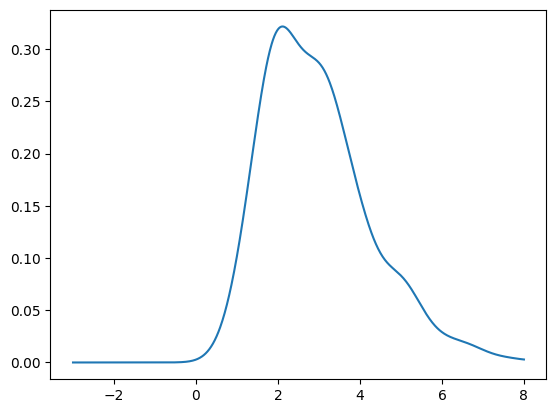

In [155]:
x = np.linspace(-3, 8, 1000)
y = stats.gaussian_kde(df['tip']).pdf(x)
plt.plot(x, y)

In [154]:
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


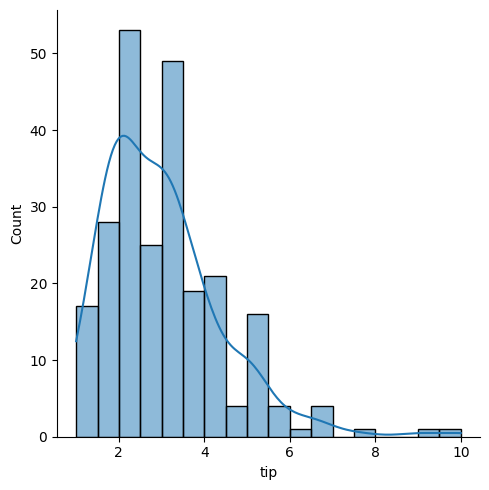

In [156]:
sns.displot(df['tip'], kde = True)

In [160]:
# チップのデータをKDEした確率分布から確率変量（値）を取得する
resample_data = stats.gaussian_kde(df['tip']).resample()
resample_data

array([[2.20314965, 2.36630859, 2.66489622, 2.10978393, 5.91255809,
        2.83449233, 1.49223916, 2.69033558, 2.70323574, 1.77734032,
        1.92731203, 1.84581529, 1.92996866, 4.84356115, 3.44491428,
        4.72176577, 2.88472566, 1.68498358, 1.63135007, 1.48758582,
        2.46694492, 3.27928605, 1.69227441, 3.51137997, 1.58548787,
        4.06667423, 1.74259103, 3.7917998 , 1.99564801, 4.27627611,
        1.99530127, 1.32964064, 1.38665126, 2.47222255, 2.50069887,
        3.71432878, 5.23855806, 4.70495883, 3.44334459, 3.65674842,
        4.19294041, 1.78691798, 4.83300836, 1.73055363, 6.45283253,
        3.14624777, 1.5874095 , 2.0342744 , 5.70419239, 2.27466333,
        2.19347642, 0.98766013, 1.91536101, 1.75870872, 6.57473514,
        4.62413517, 1.80412475, 2.91305371, 2.9486991 , 2.54211839,
        2.87203565, 1.6265494 , 2.38766705, 1.83179171, 2.63059273,
        5.09047094, 1.14802284, 2.37855963, 1.82662313, 1.85194888,
        3.09565138, 2.68411483, 1.57630981, 2.71

## 68-95-99.7ルール

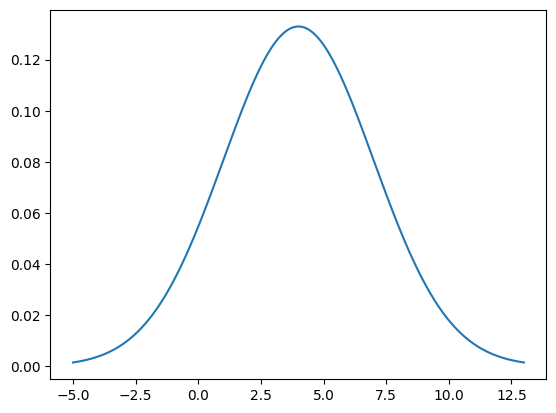

In [173]:
x = np.linspace(-5, 13, 1000)
y = stats.norm(4, 3).pdf(x)
plt.plot(x, y)

In [175]:
loc = 4
scale = 3
samples = []
group1 = []
group2 = []
group3 = []
for i in range(1000):
    sample = stats.norm(4, 3).rvs()
    if loc - scale < sample < loc + scale:
        group1.append(sample)
    elif loc - 2*scale < sample < loc + 2*scale:
        group2.append(sample)
    elif loc - 3*scale < sample < loc + 3*scale:
        group3.append(sample)
    samples.append(sample)

In [176]:
len(group1)/len(samples)

0.692

In [180]:
(len(group1)+len(group2))/len(samples)

0.959

In [182]:
(len(group1)+len(group2)+len(group3))/len(samples)

0.998

## 標準化

In [185]:
scaler = StandardScaler()

In [192]:
scaled_df = scaler.fit_transform(df.select_dtypes(exclude = 'category'))

In [197]:
df[['total_bill', 'tip', 'size', 'tip_rate']] = scaled_df

In [198]:
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,-0.314711,-1.439947,Female,No,Sun,Dinner,-0.600193,-1.663018
1,-1.063235,-0.969205,Male,No,Sun,Dinner,0.453383,-0.004282
2,0.137780,0.363356,Male,No,Sun,Dinner,0.453383,0.094915
3,0.438315,0.225754,Male,No,Sun,Dinner,-0.600193,-0.344926
4,0.540745,0.443020,Female,No,Sun,Dinner,1.506958,-0.229625
...,...,...,...,...,...,...,...,...
239,1.040511,2.115963,Male,No,Sat,Dinner,0.453383,0.707573
240,0.832275,-0.722971,Female,Yes,Sat,Dinner,-0.600193,-1.431066
241,0.324630,-0.722971,Male,Yes,Sat,Dinner,-0.600193,-1.190876
242,-0.221287,-0.904026,Male,No,Sat,Dinner,-0.600193,-1.027096


## 二項分布

In [212]:
n = 3
x = np.arange(n+1)
y = stats.binom(n, 1/6).pmf(x)

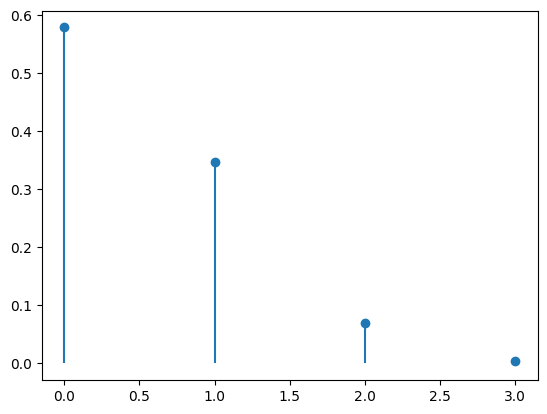

In [213]:
plt.plot(x, y, 'o')
plt.vlines(x, 0, y)

<BarContainer object of 4 artists>

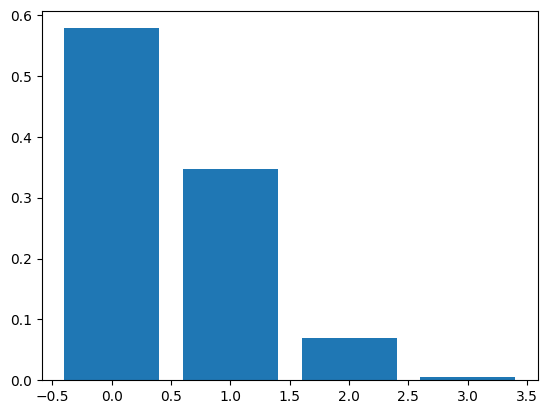

In [214]:
plt.bar(x, y)

In [239]:
n = 100
p = 1/6
x = np.arange(n+1)
y = stats.binom(n, p).pmf(x)
m = stats.binom(n, p).mean()
s = stats.binom(n, p).std()
print(f'平均：{m}, 標準偏差：{s}')

平均：16.666666666666664, 標準偏差：3.726779962499649


In [240]:
# 二項分布の分散 ： np(1-p)
np.sqrt(n*p*(1-p))

np.float64(3.7267799624996494)

<BarContainer object of 101 artists>

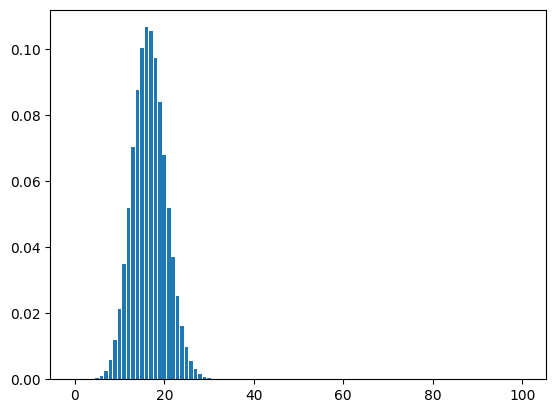

In [241]:
plt.bar(x, y)

<BarContainer object of 101 artists>

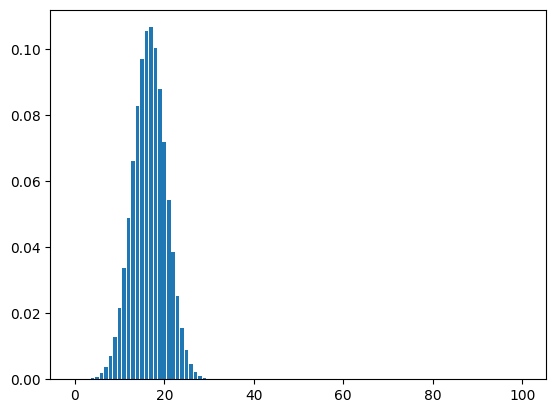

In [242]:
y_2 = stats.norm(n*p, np.sqrt(n*p*(1-p))).pdf(x)
plt.bar(x, y_2)

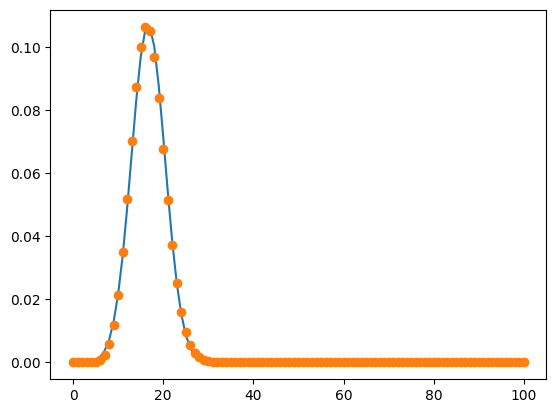

In [244]:
plt.plot(x, y_2)
plt.plot(x, y, 'o')

## 標本分布

In [264]:
samp_list = []
for _ in range(100):
    samp_list.append(df['tip'].sample(50).mean())

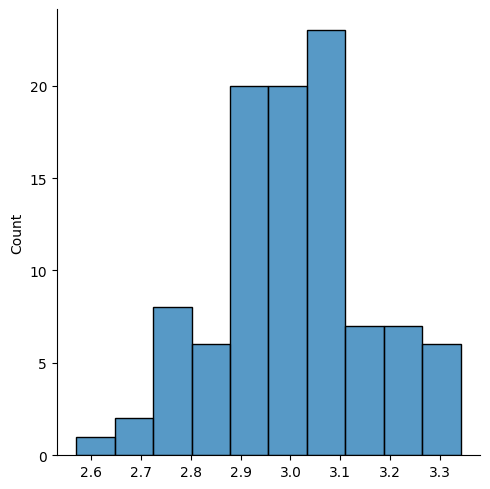

In [265]:
sns.displot(samp_list)

In [266]:
# 平均
print(np.mean(samp_list))
# 分散
print(np.var(samp_list))

3.003336
0.02381107830399996


In [271]:
# 母平均
print(df['tip'].mean())
# 母分散/n
print(df['tip'].var()/50)

2.99827868852459
0.03828909276124942


## 普遍分散

In [272]:
stats.tvar(df['tip'])

np.float64(1.914454638062471)

In [274]:
np.var(df['tip'])

np.float64(1.9066085124966412)

In [275]:
# 不偏分散の平方根
np.sqrt(stats.tvar(df['tip']))

np.float64(1.3836381890011822)

In [276]:
stats.tstd(df['tip'])

np.float64(1.3836381890011822)

In [277]:
np.std(df['tip'], ddof = 1)

np.float64(1.3836381890011822)

In [282]:
samp_list = []
for _ in range(100):
    samp_list.append(stats.tvar(df['tip'].sample(50)))

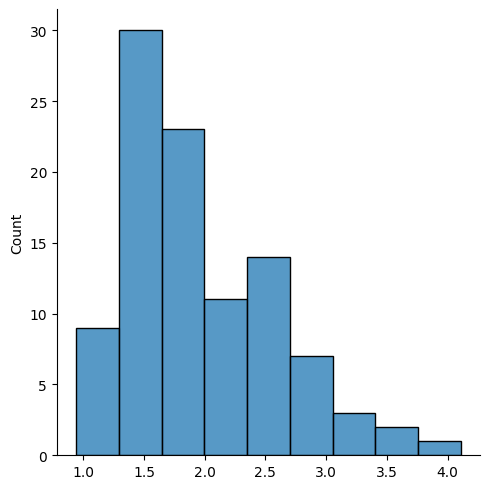

In [283]:
sns.displot(samp_list)

In [284]:
# 不偏分散の平均
np.mean(samp_list)

np.float64(1.9551074551020409)

In [285]:
samp_list = []
for _ in range(100):
    samp_list.append(np.var(df['tip'].sample(50)))

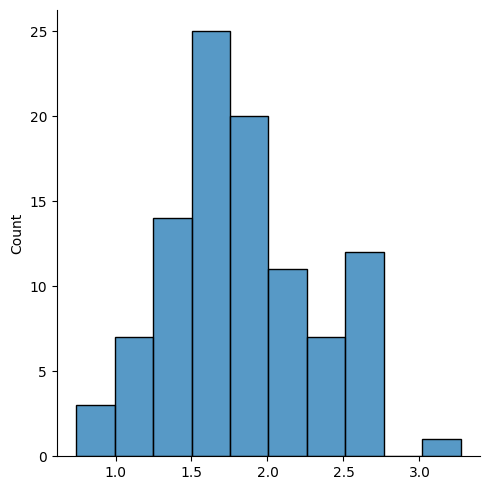

In [286]:
sns.displot(samp_list)

In [287]:
# 分散の平均
np.mean(samp_list)

np.float64(1.8205118008000003)

In [288]:
# 母集団の分散
df['tip'].var()

np.float64(1.914454638062471)

## 比率の区間推定

In [290]:
stats.binom.interval(0.95, 1000, 0.6) # 信頼区間, 標本数, 標本比率

(np.float64(570.0), np.float64(630.0))

信頼区間95%で1000個の標本で標本比率60%の場合、母集団の比率は57%〜63%になる、という区間推定。  
信頼区間95%とは、100回標本を取って標本比率を計算したとき、5回だけ区間推定した比率と違う比率になる、という考え方

### 比率の区間推定について実際に確かめてみる

In [303]:
# sexカラムの男性の比率を扱う
male_num = df[df['sex'] == 'Male']['sex'].count()
all_num = len(df)
bo_male_rate = male_num/all_num
print(bo_male_rate)

0.6434426229508197


In [305]:
# 50個の標本比率から母比率(0.64)を区間推定する
success_num = 0
n = 50
for i in range(100):
    sampled_df = df.sample(n)
    male_num = sampled_df[sampled_df['sex'] == 'Male']['sex'].count()
    male_rate = male_num/n
    min_num, max_num = stats.binom.interval(0.95, n, male_rate)
    if min_num/n <= bo_male_rate and bo_male_rate <= max_num/n:
        success_num += 1
    else:
        pass
print(f"95%信頼区間での区間推定成功数：100回中{success_num}回")

95%信頼区間での区間推定成功数：100回中95回


## 平均の区間推定

In [309]:
bo_tip_mean = df['tip'].mean()

In [317]:
df['tip'].var(ddof = 0)

np.float64(1.9066085124966412)

In [316]:
success_num = 0
n = 50
for i in range(100):
    sampled_df = df.sample(n)
    tip_mean = sampled_df['tip'].mean()
    tip_var = sampled_df['tip'].var()/n
    min_num, max_num = stats.norm.interval(0.95, loc = tip_mean, scale = np.sqrt(tip_var))
    if min_num <= bo_tip_mean <= max_num:
        success_num += 1
    else:
        pass
print(f"95%信頼区間での区間推定成功数：100回中{success_num}回")

95%信頼区間での区間推定成功数：100回中97回


## t分布

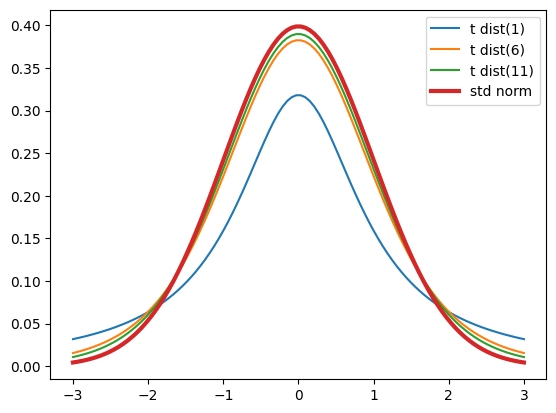

In [324]:
x = np.linspace(-3, 3, 100)
z = stats.norm.pdf(x)
for dof in range(1, 12, 5):
    t = stats.t(dof).pdf(x)
    plt.plot(x, t, label = f"t dist({dof})")
plt.plot(x, z, label = "std norm", linewidth = 3)
plt.legend()

## 正規分布による区間推定とt分布による区間推定の比較

In [332]:
# 母平均を取得
tip_mean = df['tip'].mean()
print(f"母平均：{tip_mean}")
# 50個のサンプルを取得
n = 50
sampled_df = df.sample(n)
norm_min, norm_max = stats.norm.interval(confidence = 0.95, loc = sampled_df['tip'].mean(), scale = np.sqrt(sampled_df['tip'].var()/n))
t_min, t_max = stats.t.interval(confidence = 0.95, loc = sampled_df['tip'].mean(), scale = np.sqrt(sampled_df['tip'].var()/n), df = n-1)
if norm_min <= tip_mean <= norm_max:
    print(f"正規分布による区間推定：OK {norm_min}〜{norm_max}")
else:
    print(f"正規分布による区間推定：NO {norm_min}〜{norm_max}")
if t_min <= tip_mean <= t_max:
    print(f"t分布による区間推定：OK {t_min}〜{t_max}")
else:
    print(f"t分布による区間推定：NO {t_min}〜{t_max}")

母平均：2.99827868852459
正規分布による区間推定：OK 2.5901975151314174〜3.4018024848685817
t分布による区間推定：OK 2.5799257092528727〜3.4120742907471264
